credit: 
http://people.eecs.berkeley.edu/~angelopoulos/publications/downloads/gentle_intro_conformal_dfuq.pdf 
https://mapie.readthedocs.io/en/latest/index.html 

In [172]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from mapie.classification import MapieClassifier

Generating dataset: two dimentional with three labels. For exapmle, age and blood pressure of a patient -> labeled as healthy, heart condition A, heart condition B. 

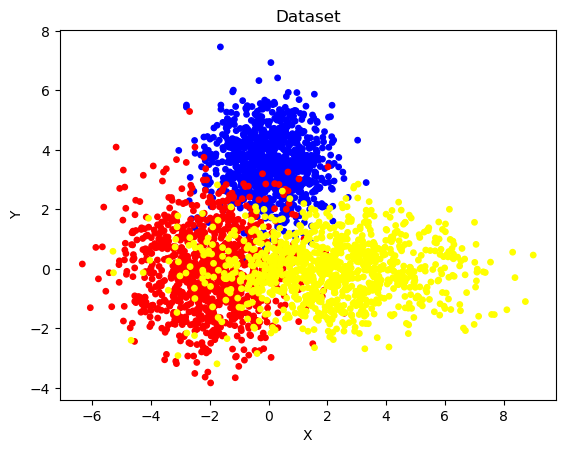

In [173]:

centers = [(0, 3.5), (-2, 0), (2, 0)]
covs = [np.eye(2), np.eye(2)*2, np.diag([5, 1])]
x_min, x_max, y_min, y_max, step = -6, 8, -6, 8, 0.1
n_samples = 1000
n_classes = 3
np.random.seed(1)

#generating data
X = np.vstack([
    np.random.multivariate_normal(center, cov, n_samples)
    for center, cov in zip(centers, covs)
])
#corresponding labels
y = np.hstack([np.full(n_samples, i) for i in range(n_classes)])

#visualization of the data
label_color = {0: "blue", 1: "red", 2:  "yellow"}
colors = list(map(label_color.get, y))

plt.scatter(
    X[:, 0],
    X[:, 1],
    color=colors,
    marker='o',
    s=15,
)
plt.title("Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


ML model 

In [174]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
X_train_cal, X_cal, y_train_cal, y_cal = train_test_split( X_train, y_train, test_size=.25)

clf = sklearn.naive_bayes.GaussianNB().fit(X_train, y_train)
# clf = sklearn.linear_model.LogisticRegression().fit(X_train, y_train)
# clf = sklearn.neighbors.KNeighborsClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)
conformal_pred = MapieClassifier(estimator=clf, cv="prefit", method="score")
conformal_pred.fit(X_cal, y_cal)
alpha = [0.2, 0.1, 0.05]
y_pred_score, y_ps_score = conformal_pred.predict(X, alpha=alpha)


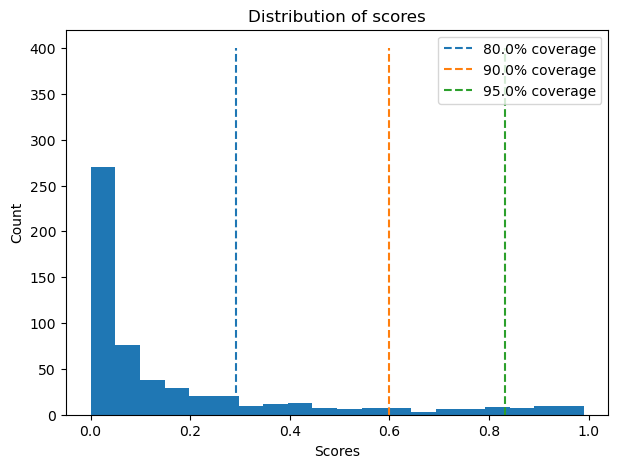

In [175]:
def plot_scores(alphas, scores, quantiles):
    colors = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c"}
    plt.figure(figsize=(7, 5))
    plt.hist(scores, bins="auto")
    for i, quantile in enumerate(quantiles):
        plt.vlines(
            x=quantile,
            ymin=0,
            ymax=400,
            color=colors[i],
            ls="dashed",
            label=f"{(1-alphas[i])*100}% coverage"
        )
    plt.title("Distribution of scores")
    plt.legend()
    plt.xlabel("Scores")
    plt.ylabel("Count")
    plt.show()

scores = conformal_pred.conformity_scores_

quantiles = conformal_pred.quantiles_
plot_scores(alpha, scores, quantiles)

bonus: look at time series (prediction interval instead of a prediction set)

https://mapie.readthedocs.io/en/latest/examples_regression/4-tutorials/plot_ts-tutorial.html#sphx-glr-examples-regression-4-tutorials-plot-ts-tutorial-py

Downside: intervals all have same width. For dynamic intervals, use conformal quantile regression:

https://mapie.readthedocs.io/en/latest/examples_regression/4-tutorials/plot_cqr_tutorial.html

https://towardsdatascience.com/how-to-predict-risk-proportional-intervals-with-conformal-quantile-regression-175775840dc4 